# Prepare Larry Set for training with scTour

In [76]:
import sys  
sys.path.insert(0, '/Users/ruitongli/scDiffEq')
from functions import *
from sctour_simulation import *
import sctour as sct

In [77]:
os. getcwd()

'/Volumes/GoogleDrive-102948143750648171876/My Drive/PhD/Docs/Academic/Rotations/Gaddy_Rotation/mv_scDiffEq/scTour_Explore'

In [78]:
startFile = "../ProcData/Weinreb2020_WholeRaw.adata.h5ad"
hvgFile = "../ProcData/Weinreb2020_hvg.h5ad"
annotFile = "../ProcData/Weinreb2020_annot.h5ad"

In [79]:
if not exists(startFile):
    from scipy.io import mmread
    whole_normed = mmread("../Data/stateFate_inVitro_normed_counts.mtx.gz")
    adata_whole = sc.AnnData(whole_normed.tocsc())
    metaD = pd.read_csv('../Data/stateFate_inVitro_metadata.txt.gz',sep="\t")
    adata_whole.obs = metaD
    adata_whole.write_h5ad(startFile)  

In [80]:
if not exists(hvgFile):
    wholeRaw = ann.read_h5ad(startFile)
    sc.pp.filter_genes(wholeRaw, min_cells=10)
    sc.pp.log1p(wholeRaw)
    sc.pp.highly_variable_genes(wholeRaw, subset=False)
    wholeRaw.var['highly_variable_Tier1'] = wholeRaw.var['highly_variable'] 
    sc.pp.highly_variable_genes(wholeRaw, subset=False,n_top_genes=5000)
    wholeRaw.var['highly_variable_Tier2'] = wholeRaw.var['highly_variable'] 
    sc.pp.highly_variable_genes(wholeRaw, subset=False,n_top_genes=10_000)
    wholeRaw.var['highly_variable_Tier3'] = wholeRaw.var['highly_variable'] 
    wholeRaw.write_h5ad(hvgFile)

In [81]:
if not exists(annotFile):
    wholeRaw = ann.read_h5ad(hvgFile)
    obsFetch = ann.read_h5ad("../General_Python/Weinreb2020_whole.h5ad")
    wholeRaw.obs = obsFetch.obs
    cf.pp.annotate_train_test(wholeRaw)
    wholeRaw.obs["n_genes_by_counts"] = wholeRaw.X.getnnz(axis=1)
    wholeRaw.write_h5ad(annotFile)

In [ ]:
wholeRaw = ann.read_h5ad(annotFile)

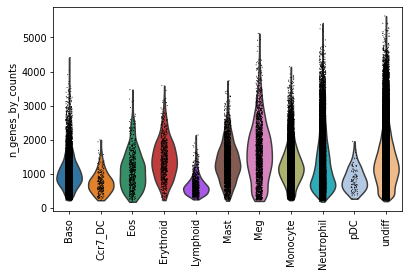

In [68]:
sc.pl.violin(wholeRaw, keys=["n_genes_by_counts"], groupby="Annotation", rotation=90,resolution=0.7)

In [96]:
if not exists("../ProcData/RestrictedTest.pickle"):   
    adata = ann.read_h5ad(annotFile)
    TrueSet = adata.obs.dropna()
    TrueSet =((TrueSet.test)&(TrueSet.early_neu_mo==1)&(TrueSet.has_fate_mask == 1)&(TrueSet.unique_test_lineage))
    pickle.dump(TrueSet, file = open("../ProcData/RestrictedTest.pickle", "wb"))